<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#273746; border:1; color: white;' role="tab" aria-controls="home"><center>Análisis de Segmentación de Clientes de la Empresa Oxford - Perú</center></h1>

<left>**Fecha: 13-12-2024**</left>


# <font color="#ba4a00"><strong>Análisis de Segmentación de Clientes en comercio electrónico - RETAIL</font>
<hr color="#F5F5F5" size="1">

<img align="right" width="240" height="240" src="https://montenbaik.com/wp-content/uploads/2011/09/logo-MTBAik-ENDURO-2011-ox-03.jpg">

En este notebook se ha realizado el trabajo de segmentación de clientes, desde Enero 2015 hasta Enero 2018 para la tienda **[Oxford Perú](https://www.oxfordstore.pe/)** para realizar un análisis descriptivo del comportamiento de sus clientes y poder proyectarlos hasta la actualidad, es preciso mencionar que los datos fueron brindados de manera no oficial (personal de amistad).

**Elaborado Por: [Econ. Mag. Enrique F. Gutierrez Rivasplata](https://github.com/EnriqueGRivas/Analisis_Bluex/tree/main/PP1)**


## <img align="left"  width="240" height="120" src="https://www.solusoft.es/Info/Imagenes/logo_proyecta.png"> 

<hr color="#F5F5F5" size="2"> 


El Análisis del **[Proyecto Bluex](https://github.com/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/4_Segmentaci%C3%B3n_de_Clientes_Parte_2.ipynb)** se hizo pensando en el proyecto realizado para la empresa **[Blue Express Perú](https://www.blue.cl/home/)** en un estudio de segmentación de clientes mediante el análisis de RFM. El propósito de este proyecto es análizar que tanto las transacciones del e-commerce es competitiva frente a otros canales de ventas, abriendo oportunidades para futuros mayoristas.

<div style="display:inline-block;vertical-align:top;">
<h2>Contenido:</h2>
<ul>
    <li><a href="#contexto-proyecto">Acerca del contexto del Proyecto</a></li>
    <li><a href="#descripcion-variables">Descripción de las variables del conjunto de datos (Dataset)</a></li>
     <li><a href="#importar-dataset">Importar Dataset</a></li>
    <li><a href="#limpiar-dataset">Comprender y limpiar el Dataset</a></li>
     <li><a href="#analisis-metricas">Análisis de métricas de ventas</a></li>
     <li><a href="#analisis-cohorte">Análisis de Cohorte</a></li>
    <li><a href="#segmentacion">Segmentación de clientes mediante RFM</a></li>
     <li><a href="#recomendaciones">Recomendaciones para productos de Lima</a></li>
     <li><a href="#referencias">Referencias</a></li>
</ul>
</div>

<a id='contexto-proyecto'></a>
# <font color="#ba4a00"><strong>Acerca del contexto del Proyecto</font>
<hr color="#F5F5F5" size="1">

### Realizar segmentación de clientes mediante la metodología RFM para comercio electrónico.

En este proyecto se debe realizar un análisis descriptivo que mostrará al gerente general de la empresa <strong>Oxford-Perú</strong>, una tienda minorista con sede en Lima, qué tan bien o mal van las ventas en su empresa.

- Oxford es una marca reconocida a nivel nacional por su amplia gama de bicicletas diseñadas para satisfacer las necesidades de diversos ciclistas. Con presencia en el mercado peruano, Oxford se ha posicionado como una excelente opción para quienes buscan una bicicleta de calidad, diseño atractivo y durabilidad. 
- Oxford ha estado presente en Perú por más de 10 años, ofreciendo sus productos y servicios a los amantes del ciclismo. 
- Una de las claves de su éxito fue la adquisición de la marca peruana Goliat, una marca tradicional con un gran reconocimiento en el mercado local. Esta adquisición les permitió fortalecer su posición y llegar a un público más amplio. 
- A lo largo de estos años, Oxford ha experimentado un crecimiento constante, ampliando su red de distribución y diversificando su oferta de productos.

Para este análisis debemos medir la participación del cliente basándose en un <mark><b>análisis de cohorte</b></mark> y realizar una <mark><b>Segmentación de clientes aplicando la metodología RFM</b></mark>, para que el negocio pueda enfocar sus esfuerzos y adoptar diferentes estrategias para cada segmento, además de realizar una limpieza y procesamiento de datos previo a esto.

<div class="alert alert-info"> 
<strong><div style="color: 0gb00,00, 0);">📌 Los principales objetivos de aprendizaje de este proyecto: </div></strong> <br>
<div style="color: 0gb00,00, 0);">→ Realizar limpieza y procesamiento de datos.</div>
<div style="color: 0gb00,00, 0);">→ Realizar un análisis de Cohorte.</div>
<div style="color: 0gb00,00, 0);">→ Realizar la segmentación de clientes utilizando el modelo RFM y</div>
<div style="color: 0gb00,00, 0);">→ Desarrollar Visualizaciones.</div>
</div>

<a id='descripcion-variables'></a>
# <font color="#ba4a00"><strong>Descripción de las variables del Dataset</font>
<hr color="#F5F5F5" size="1">

| Variables | Descripción |
| --- | --- |
| **Orden_Servicio (OS)** | Un número asignado de forma única a cada transacción. |
| **Fecha** | Fecha de la factura u OS, día en que se generó la transacción. |
| **Cod_Cliente** | Número de clientes. Un número completo de 7 dígitos alfa numerico, asignado exclusivamente a cada cliente.|
| **Distrito_cliente** | El nombre del distrito donde reside cada cliente.|
| **Cantidad** | Las cantidades de cada producto (artículo) por transacción enviadas. |
| **Ingreso_Total** | Valor de la factura expresada en soles. |


### <font color="#ba4a00"><strong>Importando Paquetes</font>

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import squarify
import matplotlib.font_manager
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from operator import attrgetter

# Configurar los gráficos para mostrar en el cuaderno jupyter
# ==============================================================================
%matplotlib inline

# Establecer gráficos con un mejor estilo
# ==============================================================================
sns.set(style="ticks")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Comprobando las versiones de las bibliotecas utilizadas.
# ==============================================================================
print('Version de Pandas -> %s' % pd.__version__)
print('Version de Numpy -> %s' % np.__version__)
print('Version de Seaborn -> %s' % sns.__version__)

Version de Pandas -> 2.1.4
Version de Numpy -> 1.26.4
Version de Seaborn -> 0.12.2


<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Nota:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ La etapa de comprensión, limpieza y procesamiento de datos es un <strong>elemento obligatorio</strong> y se evaluará su entrega, por lo que, los pasos desarrollados para tal efecto fueron <strong>descritos en detalle en este cuaderno</strong>.</div>
</div>

<a id='importar-dataset'></a>
# <font color="#ba4a00"><strong>Importar Dataset </font>
<hr color="#F5F5F5" size="1">

#### **Carga de la Base de Datos:**

In [5]:
# Dirección de la ruta donde estan almacenados los archivos a trabajar
# ==============================================================================
import os
ruta = os.chdir(r"D:\Marketing - Retail\Data Practica\Trabajo Completo")

In [7]:
# Leer el archivo Excel de la pestañas seleccionadas
# ==============================================================================
# Usamos "sheet_name=None" para leer todas las pestañas del archivo excel.
df1 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Sales_data") # Solo para leer una pestaña del excel en específico.
df2 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Reseller_data") 
df3 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Product_data")
df4 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Customer_data")
df5 = pd.read_excel("AventureWorks - Database V.2.xlsx", sheet_name="Returns_data")

#### **Armar los Datasets a trabajar:**

In [9]:
# Armando los Datasets de 
# ==============================================================================
# Extraer columnas de df1
df1_subset = df1[['Sales_Order', 'Channel', 'ResellerKey', 'CustomerKey', 'ProductKey','OrderDate','Order_Quantity','Cost_of_Freight']]

# Extraer columnas de df2
df2_subset = df2[['ResellerKey', 'Rubro', 'District', 'Province']]

# Extraer columnas de df3
df3_subset = df3[['ProductKey', 'SKU', 'Product', 'Subcategory', 'Category', 'SafetyStockLevel','ProductCost','ProductPrice']]

# Extraer columnas de df4
df4_subset = df4[['CustomerKey', 'DNI', 'Customer', 'District', 'Province', 'Department','BirthDate','MaritalStatus','Gender','YearlyIncome','NumberChildrenAtHome']]

# Extraer columnas de df5
df5_subset = df5[['ProductKey', 'ReturnQuantity']]

# Unir los dos subsets usando la columna 'Productkey' como clave.
merged_df1 = pd.merge(df1_subset, df3_subset, on='ProductKey', how='left')

# Unir los dos subsets usando la columna 'Customerkey' como clave.
merged_df2 = pd.merge(merged_df1, df4_subset, on='CustomerKey', how='left')

# Unir los dos subsets usando la columna 'Resellerkey' como clave.
merged_df3 = pd.merge(merged_df2, df2_subset, on='ResellerKey', how='left')

# Unir los dos subsets usando la columna 'Productkey' como clave.
data_retail = pd.merge(merged_df3, df5_subset, on='ProductKey', how='left')

# Mostrar las primeras filas del dataframe unido
data_retail.head()

,Sales_Order,Channel,ResellerKey,CustomerKey,ProductKey,OrderDate,Order_Quantity,Cost_of_Freight,SKU,Product,...,Department,BirthDate,MaritalStatus,Gender,YearlyIncome,NumberChildrenAtHome,Rubro,District_y,Province_y,ReturnQuantity
0,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
1,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
2,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
3,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,Lima,1975-10-25,S,M,20000,0,Propio,San Borja,Lima,1.0
4,SO43698,Internet,702,22548,346,2017-07-01,1,84.99975,BK-M82S-44,"Mountain-100 Silver, 44",...,Lima,1991-10-02,M,M,70000,0,Propio,San Borja,Lima,1.0


#### **Creando nuevas variables:**

In [11]:
# Crear nuevas variables
# ==============================================================================

data_retail['Ingreso_total'] = data_retail['Order_Quantity'] * data_retail['ProductPrice']
data_retail['Costo_total'] = data_retail['Order_Quantity'] * data_retail['ProductCost']
data_retail['Utilidad'] = data_retail['Ingreso_total'] - data_retail['Costo_total']

# Mostrar las primeras filas del dataframe con las nuevas variables
data_retail.head()

,Sales_Order,Channel,ResellerKey,CustomerKey,ProductKey,OrderDate,Order_Quantity,Cost_of_Freight,SKU,Product,...,Gender,YearlyIncome,NumberChildrenAtHome,Rubro,District_y,Province_y,ReturnQuantity,Ingreso_total,Costo_total,Utilidad
0,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
1,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
2,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
3,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
4,SO43698,Internet,702,22548,346,2017-07-01,1,84.99975,BK-M82S-44,"Mountain-100 Silver, 44",...,M,70000,0,Propio,San Borja,Lima,1.0,3399.99,1912.1544,1487.8356


#### **Visualización de los valores perdidos:**

<a id='detectar-nulo'></a>
## <font color="#ba4a00"><strong>Detección de nulos o Vacíos </font>
<hr color="#F5F5F5" size="1">

Hay 52223 filas con datos en la columna 'Devoluciones' para un total de 5,327,418 datos o filas. Es decir, tenemos que <mark><strong> reemplazar cada fila vacia o NaN con cero para que así se pueda leer mejor la columna</strong></mark>.

<div class="alert alert-warning"> 
<strong><div style="color: rgb(0, 0, 0);">☠️  Importante:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">En el análisis de cohortes de clientes, utilizamos una fecha de cohorte como criterio para calcular la retención de clientes. Para evitar crear escenarios de retención falsos, ya que, no podemos confirmar que los clientes con una identificación nula sean o no los mismos que los que ya se contabilizaron en alguna fecha de cohorte,<strong> eliminar registros que tengan 'CustomerKey' o 'DNI'nulo</strong> y evitar este error. </div>
</div>

<Axes: >

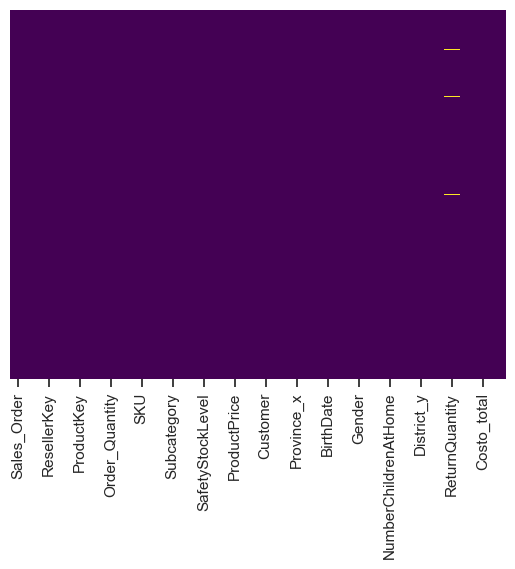

In [13]:
# Visualización de valores perdidos
# ==============================================================================
sns.heatmap(data_retail.isnull(),
            yticklabels = False,
            cbar = False,
            cmap='viridis')

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✨  Nota:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ Como se aprecia en el grafico, existen algunos puntos de color <mark><b>amarillo</b></mark> que nos indica que existen elementos en blanco o NaNs, de la columna <strong> "ReturnQuantity"</strong> y del cual representan un 0.98%.</div>
</div>

In [15]:
# Identificamos la cantidad de NANs en cada función y seleccione solo aquellas que tienen NANs
# ==============================================================================
total_NA = data_retail.isnull().sum()[data_retail.isnull().sum() != 0]

# Calculamos el porcentaje de NANs en cada característica
percent_NA = data_retail.isnull().sum()[data_retail.isnull().sum() != 0]/data_retail.shape[0]

# Resumen de nuestros hallazgos en un Data Frame
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NANs', 'Porcentaje']).sort_values('Total NANs', ascending=False)
missing

,Total NANs,Porcentaje
ReturnQuantity,52223,0.009803


#### **Renombrando las columnas:**

In [17]:
# Renombrando las columnas:
# ==============================================================================
data_retail.rename({'Sales_Order':'Orden_Servicio','Channel':'Canal','ResellerKey':'Cod_Revendedor','CustomerKey':'Cod_Cliente','ProductKey':'Cod_Producto',
                    'OrderDate':'Fecha','Order_Quantity':'Cantidad','Cost_of_Freight':'Costo_Flete','Product':'Producto','Subcategory':'Subcategoria',
                    'Category':'Categoria','SafetyStockLevel':'Stock_Seguridad','ProductCost':'PC', 'ProductPrice':'PV','Customer':'Cliente',
                    'District_x':'Distrito_Cliente','Province_x':'Provincia_Cliente','Department':'Departamento','BirthDate':'Cumpleaños',
                    'MaritalStatus':'Estado_Civil','Gender':'Genero','YearlyIncome':'Ingreso_Anual','NumberChildrenAtHome':'Hijos','District_y':'Distrito_Revend',
                    'Province_y':'Provincia_Revend','ReturnQuantity':'Devoluciones'}, axis=1,inplace=True)
data_retail.head()

,Orden_Servicio,Canal,Cod_Revendedor,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Costo_Flete,SKU,Producto,...,Genero,Ingreso_Anual,Hijos,Rubro,Distrito_Revend,Provincia_Revend,Devoluciones,Ingreso_total,Costo_total,Utilidad
0,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
1,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
2,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
3,SO43697,Internet,702,27207,310,2017-07-01,1,89.45675,BK-R93R-62,"Road-150 Red, 62",...,M,20000,0,Propio,San Borja,Lima,1.0,3578.27,2171.2942,1406.9758
4,SO43698,Internet,702,22548,346,2017-07-01,1,84.99975,BK-M82S-44,"Mountain-100 Silver, 44",...,M,70000,0,Propio,San Borja,Lima,1.0,3399.99,1912.1544,1487.8356


#### **Reemplazar los NaN con cero:**

In [19]:
# Reemplazar NaN por 0 en la columna 'Devoluciones'
# ==============================================================================
data_retail['Devoluciones'] = data_retail['Devoluciones'].fillna(0) # Para reemplazar los NaN con cero.

# Comprobando si hay valores nulos en alguna de las columnas
data_retail.isnull().values.any()

False

#### **Extrayendo el periodo de trabajo:**

Luego de esto, se puede validar que no existen más campos nulos o vacíos en ninguna de las columnas.

In [21]:
# Mostramos el número de filas y columnas
# ==============================================================================
print(f'El dataframe tiene {data_retail.shape[0]} filas y {data_retail.shape[1]} columnas.')

El dataframe tiene 5327418 filas y 32 columnas.


<a id='limpiar-dataset'></a>
## <font color="#ba4a00"><strong>Comprender y limpiar el Dataset </font>
<hr color="#F5F5F5" size="1">

In [23]:
# Mostramos el tipo de variable de cada columna
# ==============================================================================
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5327418 entries, 0 to 5327417
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Orden_Servicio     object        
 1   Canal              object        
 2   Cod_Revendedor     int64         
 3   Cod_Cliente        int64         
 4   Cod_Producto       int64         
 5   Fecha              datetime64[ns]
 6   Cantidad           int64         
 7   Costo_Flete        float64       
 8   SKU                object        
 9   Producto           object        
 10  Subcategoria       object        
 11  Categoria          object        
 12  Stock_Seguridad    int64         
 13  PC                 float64       
 14  PV                 float64       
 15  DNI                int64         
 16  Cliente            object        
 17  Distrito_Cliente   object        
 18  Provincia_Cliente  object        
 19  Departamento       object        
 20  Cumpleaños         datet

#### **Escogiendo las columnas a trabajar:**

In [25]:
# Seleccionamos las columnas a trabajar, filtrando el numero que corresponden a las mismas
# ==============================================================================
df = data_retail.iloc[:, [0,3,4,5,6,9,15,16,17,19,29,31]]

df.head()

,Orden_Servicio,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Producto,DNI,Cliente,Distrito_Cliente,Departamento,Ingreso_total,Utilidad
0,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
1,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
2,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
3,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.9758
4,SO43698,22548,346,2017-07-01,1,"Mountain-100 Silver, 44",68398647,Gomez Loayza Alejandro Esteban,Santiago de Surco,Lima,3399.99,1487.8356


<a id='detectar-duplicados'></a>
## <font color="#ba4a00"><strong>Detección y eliminación de datos duplicados </font>
<hr color="#F5F5F5" size="1">

In [27]:
# Definir las columnas a considerar para la duplicación
# ==============================================================================
dup_cols = ['Orden_Servicio', 'Cod_Cliente', 'Cod_Producto', 'Fecha','Cantidad']

# Eliminar duplicados, manteniendo la primera aparición
ecommerce = df[~df.duplicated(subset=dup_cols, keep='first')]

# Mostrar las primeras filas del dataframe para verificar
ecommerce.head(10)

,Orden_Servicio,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Producto,DNI,Cliente,Distrito_Cliente,Departamento,Ingreso_total,Utilidad
0,SO43697,27207,310,2017-07-01,1,"Road-150 Red, 62",10481355,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.2700,1406.9758
4,SO43698,22548,346,2017-07-01,1,"Mountain-100 Silver, 44",68398647,Gomez Loayza Alejandro Esteban,Santiago de Surco,Lima,3399.9900,1487.8356
6,SO43699,21163,346,2017-07-01,1,"Mountain-100 Silver, 44",40912720,Agripina Yupanqui Monica,Santiago de Surco,Lima,3399.9900,1487.8356
8,SO43700,26187,336,2017-07-01,1,"Road-650 Black, 62",64444546,Najarro Garcia Jose Evsevio,Ventanilla,Callao,699.0982,285.9519
9,SO43701,23006,346,2017-07-01,1,"Mountain-100 Silver, 44",76019684,Tinco Diaz Abigail Cristina,Santiago de Surco,Lima,3399.9900,1487.8356
11,SO43702,28087,311,2017-07-01,1,"Road-150 Red, 44",76784364,Vela Burga Miguel Angel,Santiago de Surco,Lima,3578.2700,1406.9758
18,SO43703,19285,310,2017-07-01,1,"Road-150 Red, 62",40195574,Muoz Vallejo Maria Isabel,Catacaos,Piura,3578.2700,1406.9758
22,SO43704,17977,351,2017-07-01,1,"Mountain-100 Black, 48",65468014,Blumen Alegria Leyser,Trujillo,La Libertad,3374.9900,1476.8956
24,SO43705,13459,344,2017-07-01,1,"Mountain-100 Silver, 38",10530528,Caldero Arnao Patricia Ines,Santiago de Surco,Lima,3399.9900,1487.8356
25,SO43659,11000,349,2017-07-02,1,"Mountain-100 Black, 42",63289754,Aguilar Saavedra Fernando,Ventanilla,Callao,3374.9900,1476.8956


In [29]:
# Mostramos el número de filas y columnas del dataframe "ecommerce"
# ==============================================================================
print(f'El dataframe tiene {ecommerce.shape[0]} filas y {ecommerce.shape[1]} columnas.')

El dataframe tiene 177299 filas y 12 columnas.


Para evitar contar la misma venta dos o más veces, eliminaremos las ventas que estuvieran duplicadas, dejando solo 1 venta por cada una, para esto hemos filtrado las columnas que se repetia o coincidian en el **"Orden_Servicio", "Cod_Cliente", "Cod_Producto", "Fecha" y "Cantidad"**. Ahora tenemos 177,299 registros, es decir, han sido identificados y <mark><strong>eliminados 5,150,119 líneas duplicadas</strong></mark>.

<div class="alert alert-info"> 
<strong><div style="color: rgb(0, 0, 0);">✔️ Resultado:</div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ Como resultado de la limpieza realizada tenemos 177,299 registros luego de aplicar la limpieza de datos. </div>
</div>


Pero primero, para permitir la manipulación de datos, aplicaremos algunos tratamientos necesarios para el análisis.

<a id='tratamiento-datos'></a>
## <font color="#ba4a00"><strong>Tratamiento de Datos </font>
<hr color="#F5F5F5" size="1">

In [31]:
# Convertir las columnas 'Numérico' a formato objeto
# ==============================================================================
#ecommerce['Cod_Cliente'] = ecommerce['Cod_Cliente'].astype(str)
ecommerce['Cod_Cliente'] = ecommerce['Cod_Cliente'].astype(np.float64)
ecommerce['Cod_Producto'] = ecommerce['Cod_Producto'].astype(str)
#ecommerce['DNI'] = ecommerce['DNI'].astype(str)
ecommerce['DNI'] = ecommerce['DNI'].astype(np.float64)

# Convertir las columnas 'Numéricas' a dos decimales
# ==============================================================================
ecommerce['Ingreso_total'] = ecommerce['Ingreso_total'].round(2)
ecommerce['Utilidad'] = ecommerce['Utilidad'].round(2)

# Obteniendo año y mes de la fecha 
ecommerce['Year_mes'] = ecommerce['Fecha'].dt.to_period('M')

ecommerce.head(7)

,Orden_Servicio,Cod_Cliente,Cod_Producto,Fecha,Cantidad,Producto,DNI,Cliente,Distrito_Cliente,Departamento,Ingreso_total,Utilidad,Year_mes
0,SO43697,27207.0,310,2017-07-01,1,"Road-150 Red, 62",10481355.0,Fernandez Zambrano Luis Angel,San Borja,Lima,3578.27,1406.98,2017-07
4,SO43698,22548.0,346,2017-07-01,1,"Mountain-100 Silver, 44",68398647.0,Gomez Loayza Alejandro Esteban,Santiago de Surco,Lima,3399.99,1487.84,2017-07
6,SO43699,21163.0,346,2017-07-01,1,"Mountain-100 Silver, 44",40912720.0,Agripina Yupanqui Monica,Santiago de Surco,Lima,3399.99,1487.84,2017-07
8,SO43700,26187.0,336,2017-07-01,1,"Road-650 Black, 62",64444546.0,Najarro Garcia Jose Evsevio,Ventanilla,Callao,699.10,285.95,2017-07
9,SO43701,23006.0,346,2017-07-01,1,"Mountain-100 Silver, 44",76019684.0,Tinco Diaz Abigail Cristina,Santiago de Surco,Lima,3399.99,1487.84,2017-07
11,SO43702,28087.0,311,2017-07-01,1,"Road-150 Red, 44",76784364.0,Vela Burga Miguel Angel,Santiago de Surco,Lima,3578.27,1406.98,2017-07
18,SO43703,19285.0,310,2017-07-01,1,"Road-150 Red, 62",40195574.0,Muoz Vallejo Maria Isabel,Catacaos,Piura,3578.27,1406.98,2017-07


In [33]:
ecommerce.dtypes

Orden_Servicio              object
Cod_Cliente                float64
Cod_Producto                object
Fecha               datetime64[ns]
Cantidad                     int64
Producto                    object
DNI                        float64
Cliente                     object
Distrito_Cliente            object
Departamento                object
Ingreso_total              float64
Utilidad                   float64
Year_mes                 period[M]
dtype: object

<div class="alert alert-success"> 
    <strong><div style="color: rgb(0, 0, 0);"><strong>Resumiendo los pasos de limpieza y tratamiento realizados:</strong></div></strong> <br>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Eliminación de 5,150,119 facturas duplicadas. </div>   
    <div style="color: rgb(0, 0, 0);">→ ✔️ Utilizaremos <strong><font color="#ff009e">177,299 facturas para nuestro análisis.</font></strong></div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Conversión de tipos de datos de algunas columnas. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Creación de una columna de Año y Mes para facilitar el análisis. </div>
    <div style="color: rgb(0, 0, 0);">→ ✔️ Conjunto de datos listo. ¡Empecemos! 💪 </div>
</div>